In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [64]:
data = pd.read_csv('train.csv',)
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [65]:
data.shape

(550068, 12)

In [66]:
num_cols = data.select_dtypes(include=np.number)
cat_cols = data.select_dtypes(exclude=np.number)

In [67]:
num_cols

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...
550063,1006033,13,1,20,NaN,NaN,368
550064,1006035,1,0,20,NaN,NaN,371
550065,1006036,15,1,20,NaN,NaN,137
550066,1006038,1,0,20,NaN,NaN,365


In [68]:
num_cols.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [69]:
cat_cols

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


In [70]:
# cheking no. of columns

In [71]:
for i in cat_cols:
    print(i)
    print(data[i].nunique())
    print()

Product_ID
3631

Gender
2

Age
7

City_Category
3

Stay_In_Current_City_Years
5



In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [73]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [74]:
cat_cols.mode()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00265242,M,26-35,B,1


In [75]:
# cheking for duplicates
data.duplicated().sum()

0

In [76]:
# checking for null
data.isnull().sum()/data.shape[0]

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [77]:
# Imputing missing values of product_category_2 using best imputing techniques

In [78]:
data.Product_Category_2.head()

0     NaN
1     6.0
2     NaN
3    14.0
4     NaN
Name: Product_Category_2, dtype: float64

In [79]:
data_imputed = data.drop(columns=['Product_Category_3']).interpolate(method='linear', limit_direction='forward', axis=0)

# Print the imputed DataFrame
df_imputed = pd.DataFrame(data_imputed)
df_imputed


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,10.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,2.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,2.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,2.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,2.0,365


In [80]:
data.Product_Category_2 = df_imputed.Product_Category_1

In [81]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [82]:
# Dropping product_category_3 as it has a lot of missing values 
data = data.drop(columns=['Product_Category_3'])

In [83]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,1,15200


# Feature Engineering

In [84]:
data.Age.unique() # as this feature 

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [85]:
data.Age = data.Age.map({'0-17':'kids','18-25':'youth1','26-35':'youth2','36-45':'youth3',
             '46-50':'mid-fourties','51-55':'Fifties','55+':'above55'})

In [86]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,kids,10,A,2,0,3,3,8370
1,1000001,P00248942,F,kids,10,A,2,0,1,1,15200


# Checking for Outliers

In [87]:
num = data.select_dtypes(include=np.number)
num.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

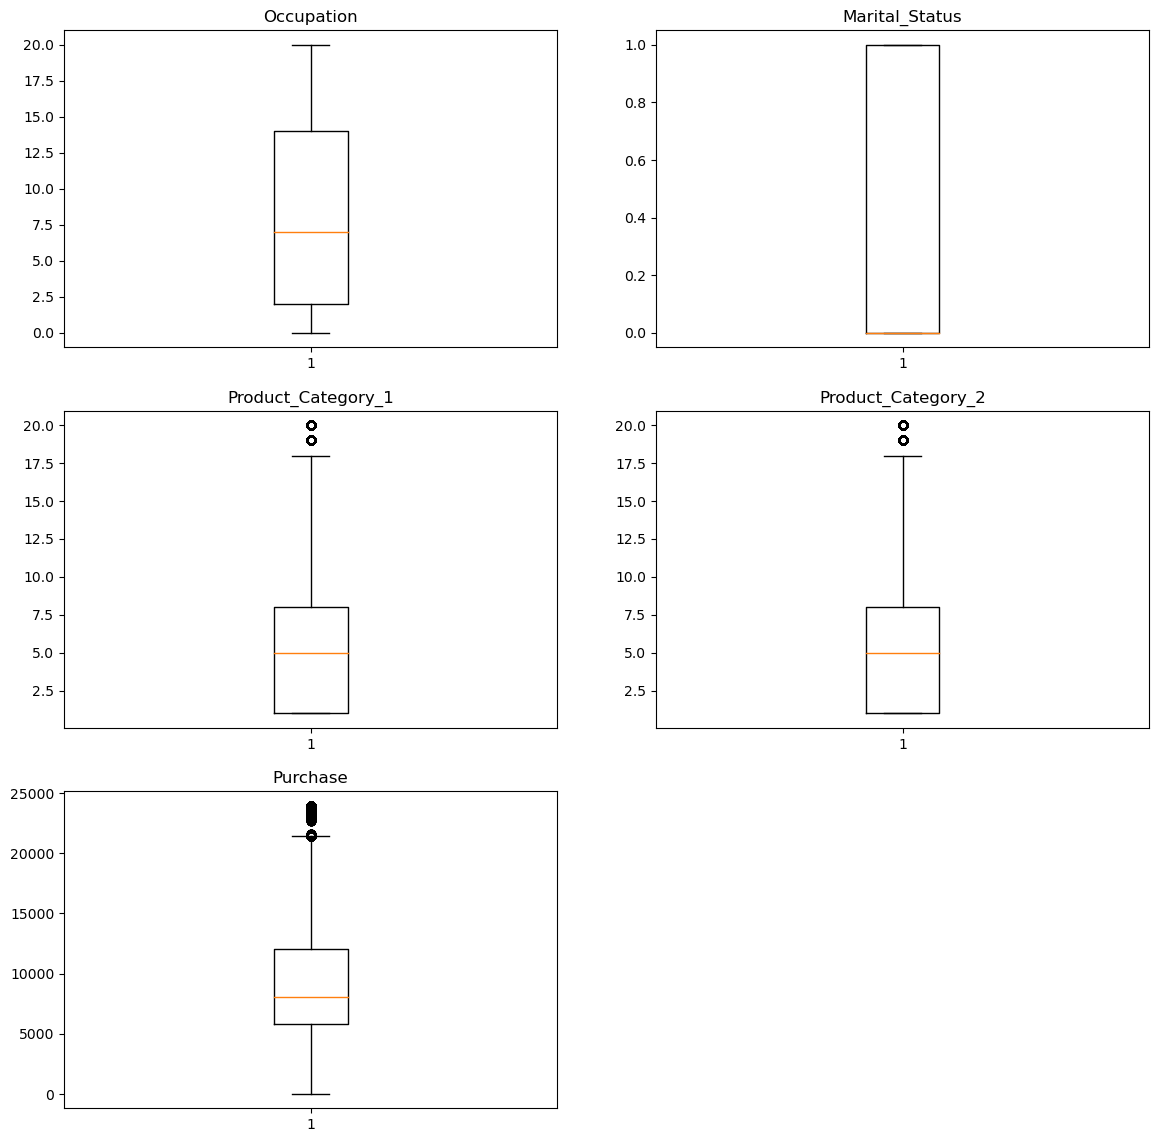

In [88]:
plt.figure(figsize=(14,14))
t=1
for i in num:
    if i != 'User_ID':
        plt.subplot(3,2,t)
        plt.boxplot(data=data,x=i)
        plt.title(i)
        t+=1
plt.show()
    

In [89]:
data.shape

(550068, 11)

In [90]:
import warnings 
warnings.filterwarnings('ignore')

In [91]:
# treating outliers
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr

In [92]:
q1

User_ID               1001516.0
Occupation                  2.0
Marital_Status              0.0
Product_Category_1          1.0
Product_Category_2          1.0
Purchase                 5823.0
Name: 0.25, dtype: float64

In [93]:
data[~((data<(ul))|(data>(ll))).any(axis=1)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase


In [94]:
# no outliers as per inter quartile range

# Univariate Analysis

In [95]:
num.columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [96]:
colors=['tomato', 'blueviolet', 'mediumseagreen', 'gold', 'cornflowerblue', 'darkorange']

In [97]:
num = num.columns

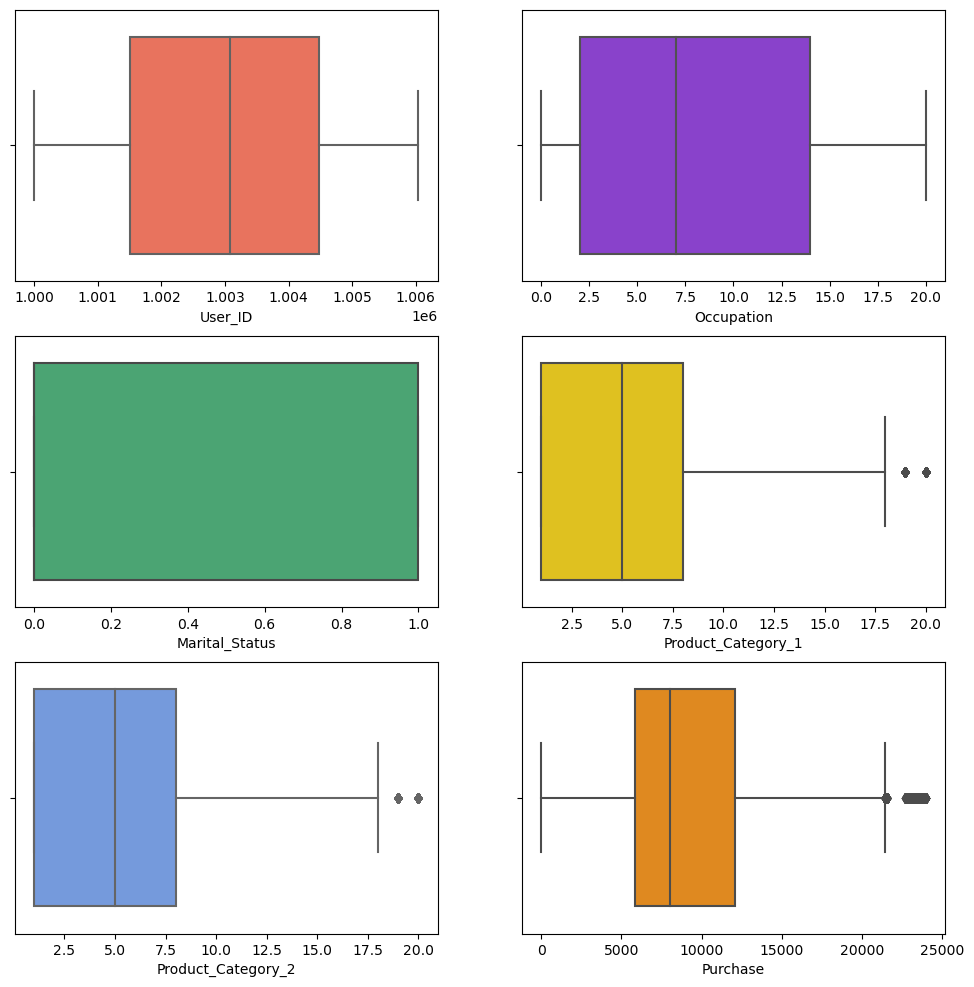

In [98]:
plt.figure(figsize=(12,12))
t=1
for i in range(6):
    plt.subplot(3,2,t)
    sns.boxplot(data=data,x=num[i],color=colors[i])
    t+=1
plt.show()

In [99]:
# product_category 2 has few outliers as per this boxplot 
# skewness and kurtosis of the data is given 
print(data[num].skew())
print()
print(data[num].kurt())

User_ID               0.003066
Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2    1.025735
Purchase              0.600140
dtype: float64

User_ID              -1.195501
Occupation           -1.216114
Marital_Status       -1.864997
Product_Category_1    1.234757
Product_Category_2    1.234757
Purchase             -0.338378
dtype: float64


In [100]:
def subplot(num_cols):
    a = len(num_cols)
    print('total number of columns is ',a)
    for i in range(1,a):
        for j in range(i):
            if i*j==a:
                print(f'pairs we can take is :{i} * {j} = {a}')
            
    
    

In [101]:
subplot(num)

total number of columns is  6
pairs we can take is :3 * 2 = 6


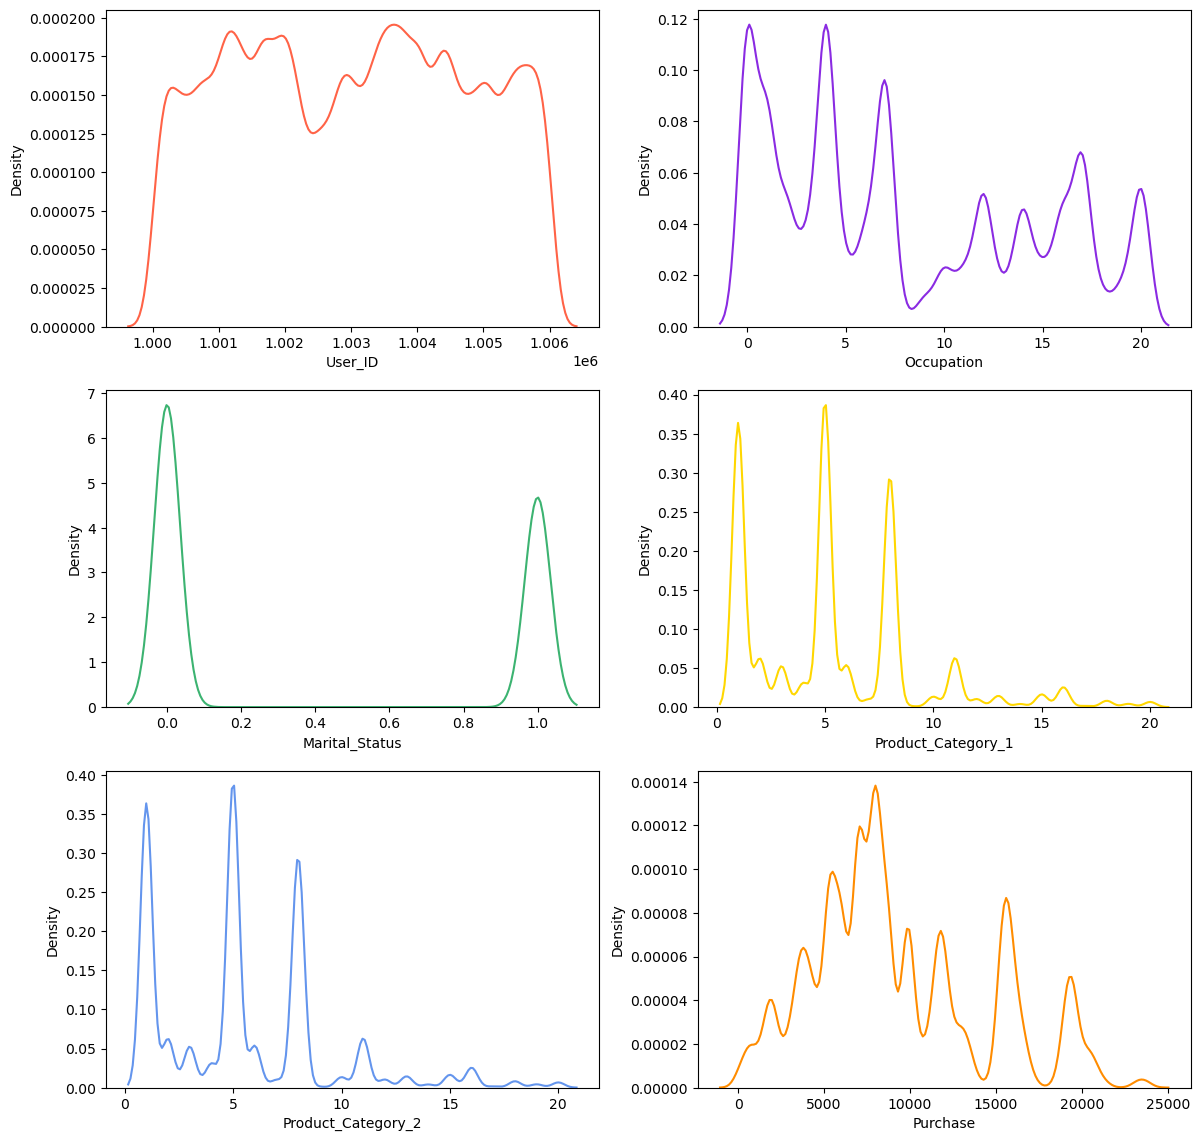

In [102]:
# cheking the spread of the numeric columns 
plt.figure(figsize=(14,14))
t=1
for i in range(len(num)):
    plt.subplot(3,2,t)
    sns.kdeplot(data=data,x=num[i],color = colors[i])
    t+=1
plt.show()

In [103]:
# category columns

In [104]:
cat = cat_cols.columns
subplot(cat)

total number of columns is  5


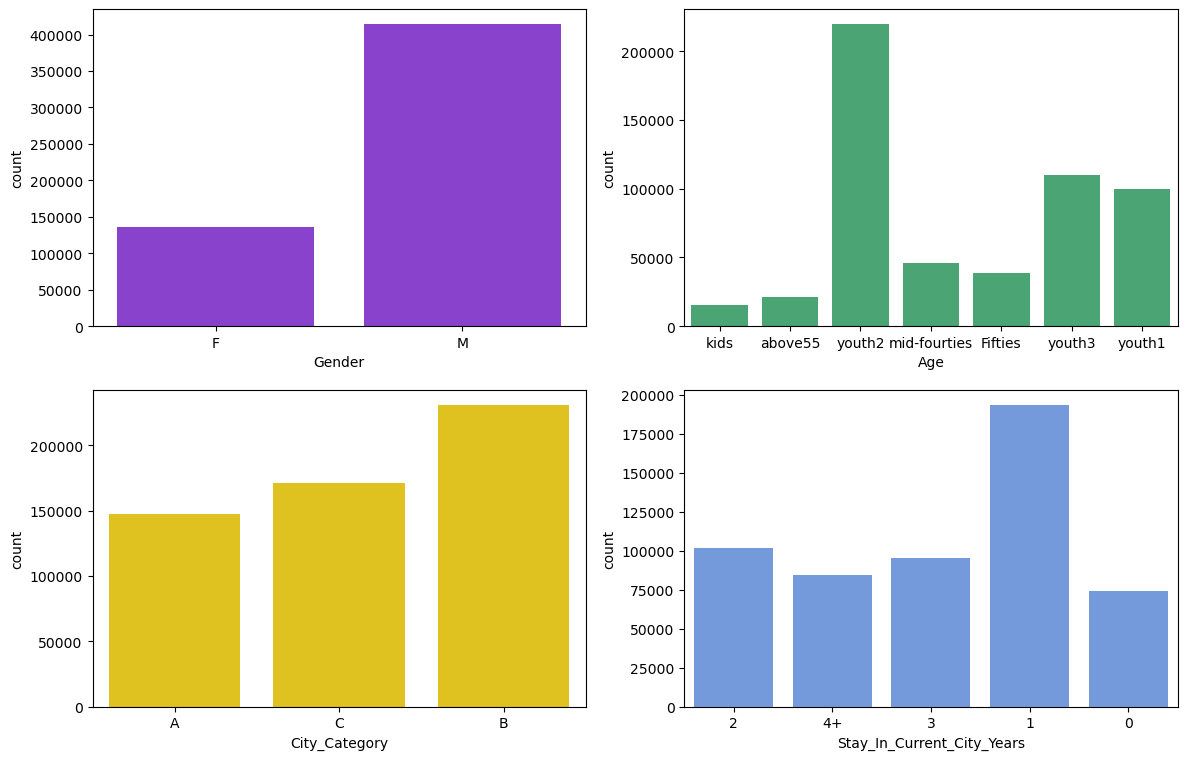

In [105]:
# cheking the spread of the numeric columns 
plt.figure(figsize=(14,14))
t=1
for i in range(len(cat)):
    if i != 0:
        plt.subplot(3,2,t)
        sns.countplot(data=data,x=cat[i],color = colors[i])
        t+=1
plt.show()

# Bivariate Analysis

## num_cols vs target(numerical)

In [106]:
subplot(num)

total number of columns is  6
pairs we can take is :3 * 2 = 6


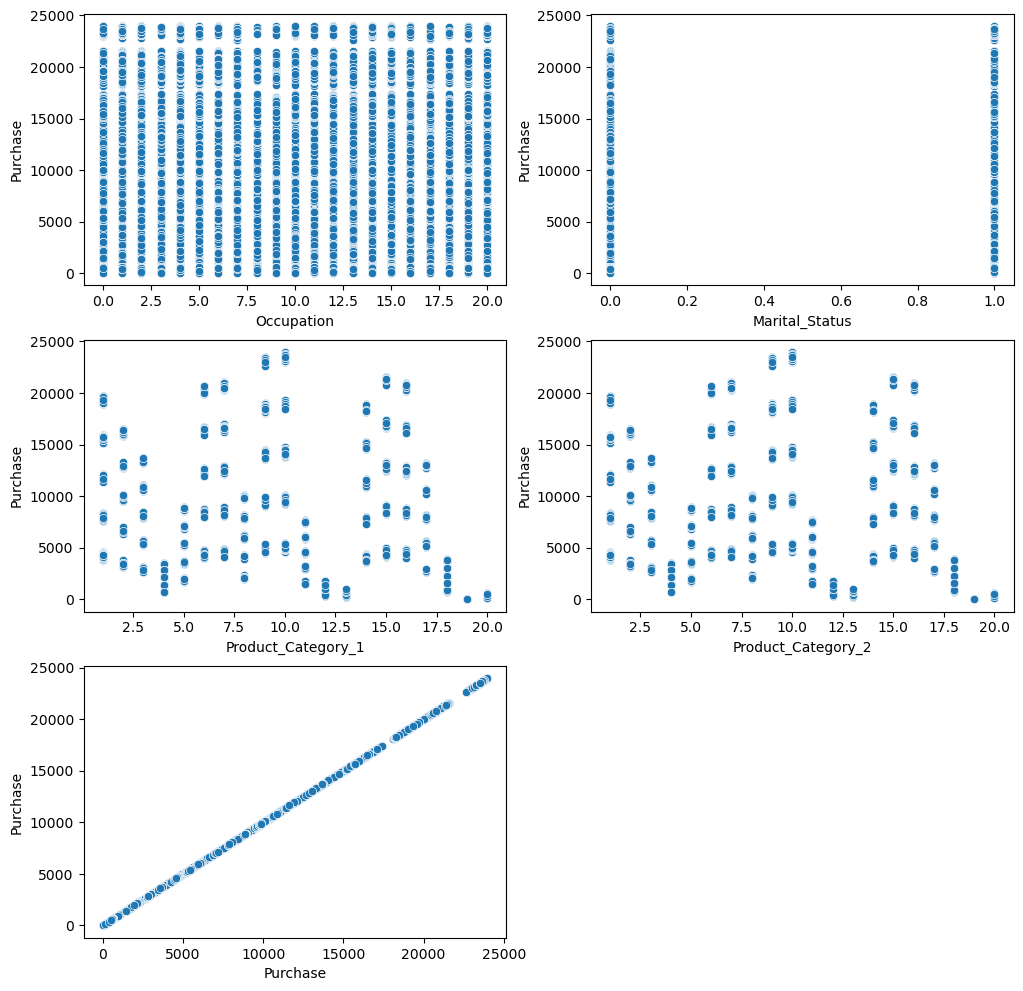

In [107]:
plt.figure(figsize=(12,12))
t=1
for i in range(len(num)):
    if i !=0:
        plt.subplot(3,2,t)
        sns.scatterplot(data=data,x=num[i],y=data.Purchase)
        t+=1
plt.show()

## cat_cols vs target(numerical)

In [108]:
subplot(cat)

total number of columns is  5


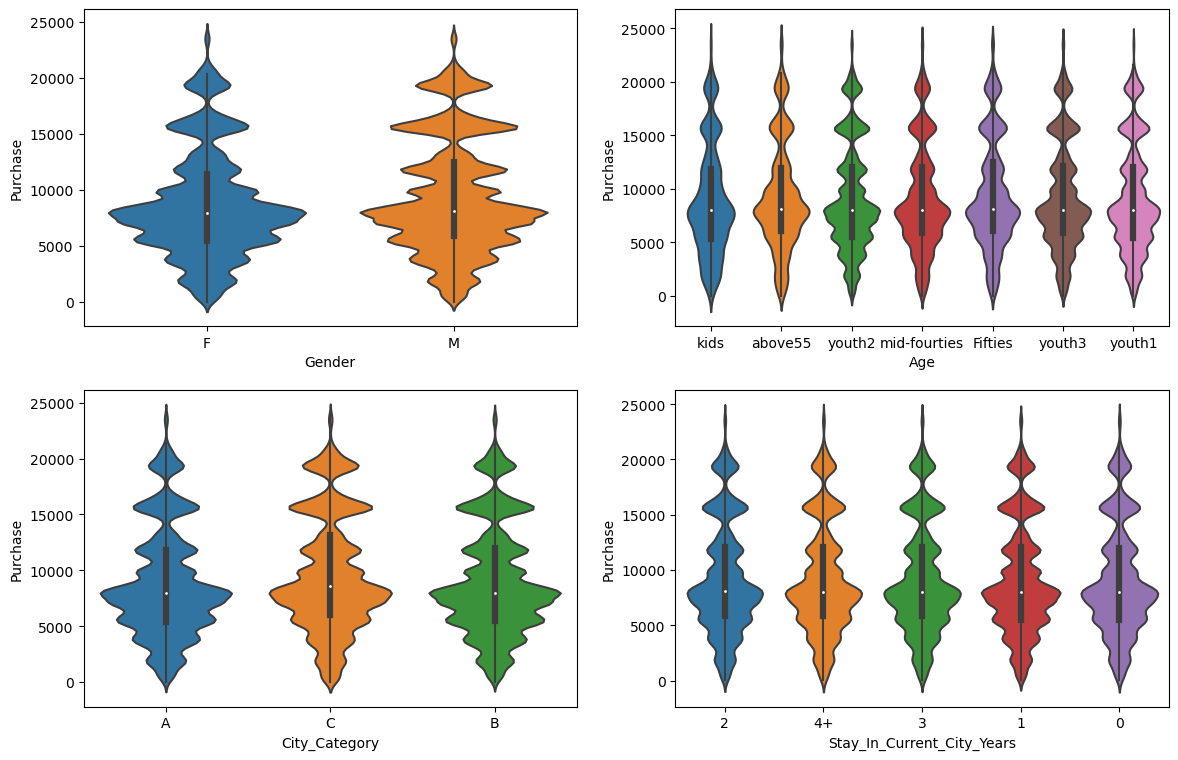

In [109]:
# cheking the spread of the numeric columns 
plt.figure(figsize=(14,14))
t=1
for i in range(len(cat)):
    if i != 0:
        plt.subplot(3,2,t)
        sns.violinplot(data=data,x=cat[i],y=data.Purchase)
        t+=1
plt.show()

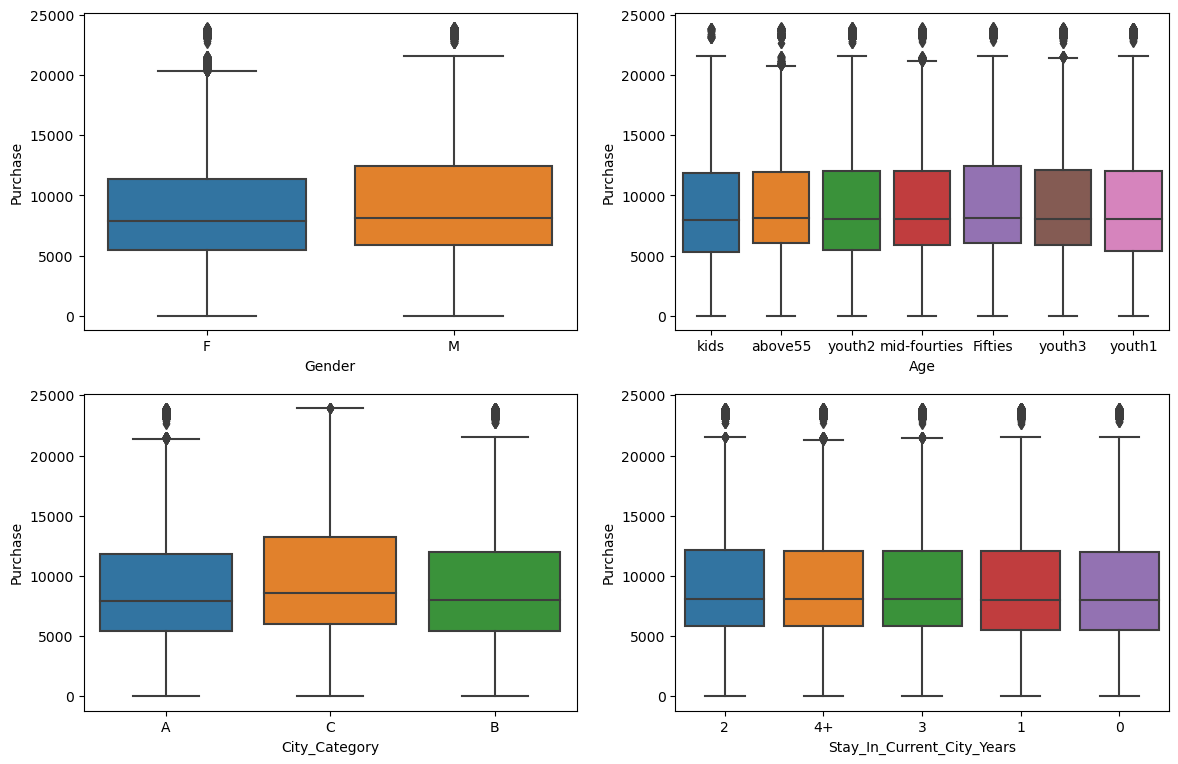

In [110]:
# cheking the spread of the numeric columns 
plt.figure(figsize=(14,14))
t=1
for i in range(len(cat)):
    if i != 0:
        plt.subplot(3,2,t)
        sns.boxplot(data=data,x=cat[i],y=data.Purchase)
        t+=1
plt.show()

# Multivariate Analysis

# allnum vs target

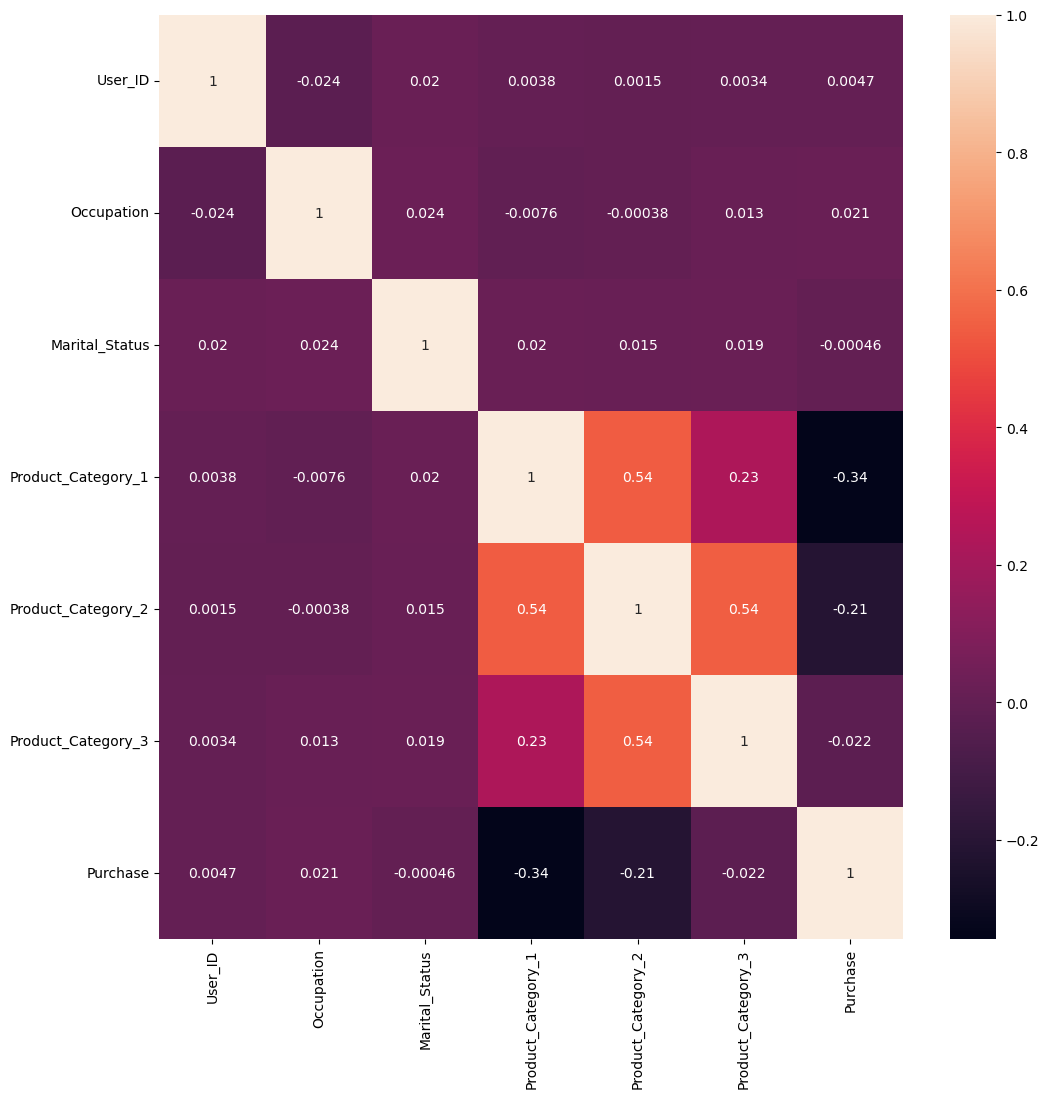

In [111]:
plt.figure(figsize=(12,12))
sns.heatmap(num_cols.corr(),annot=True)
plt.show()

<Figure size 1200x1200 with 0 Axes>

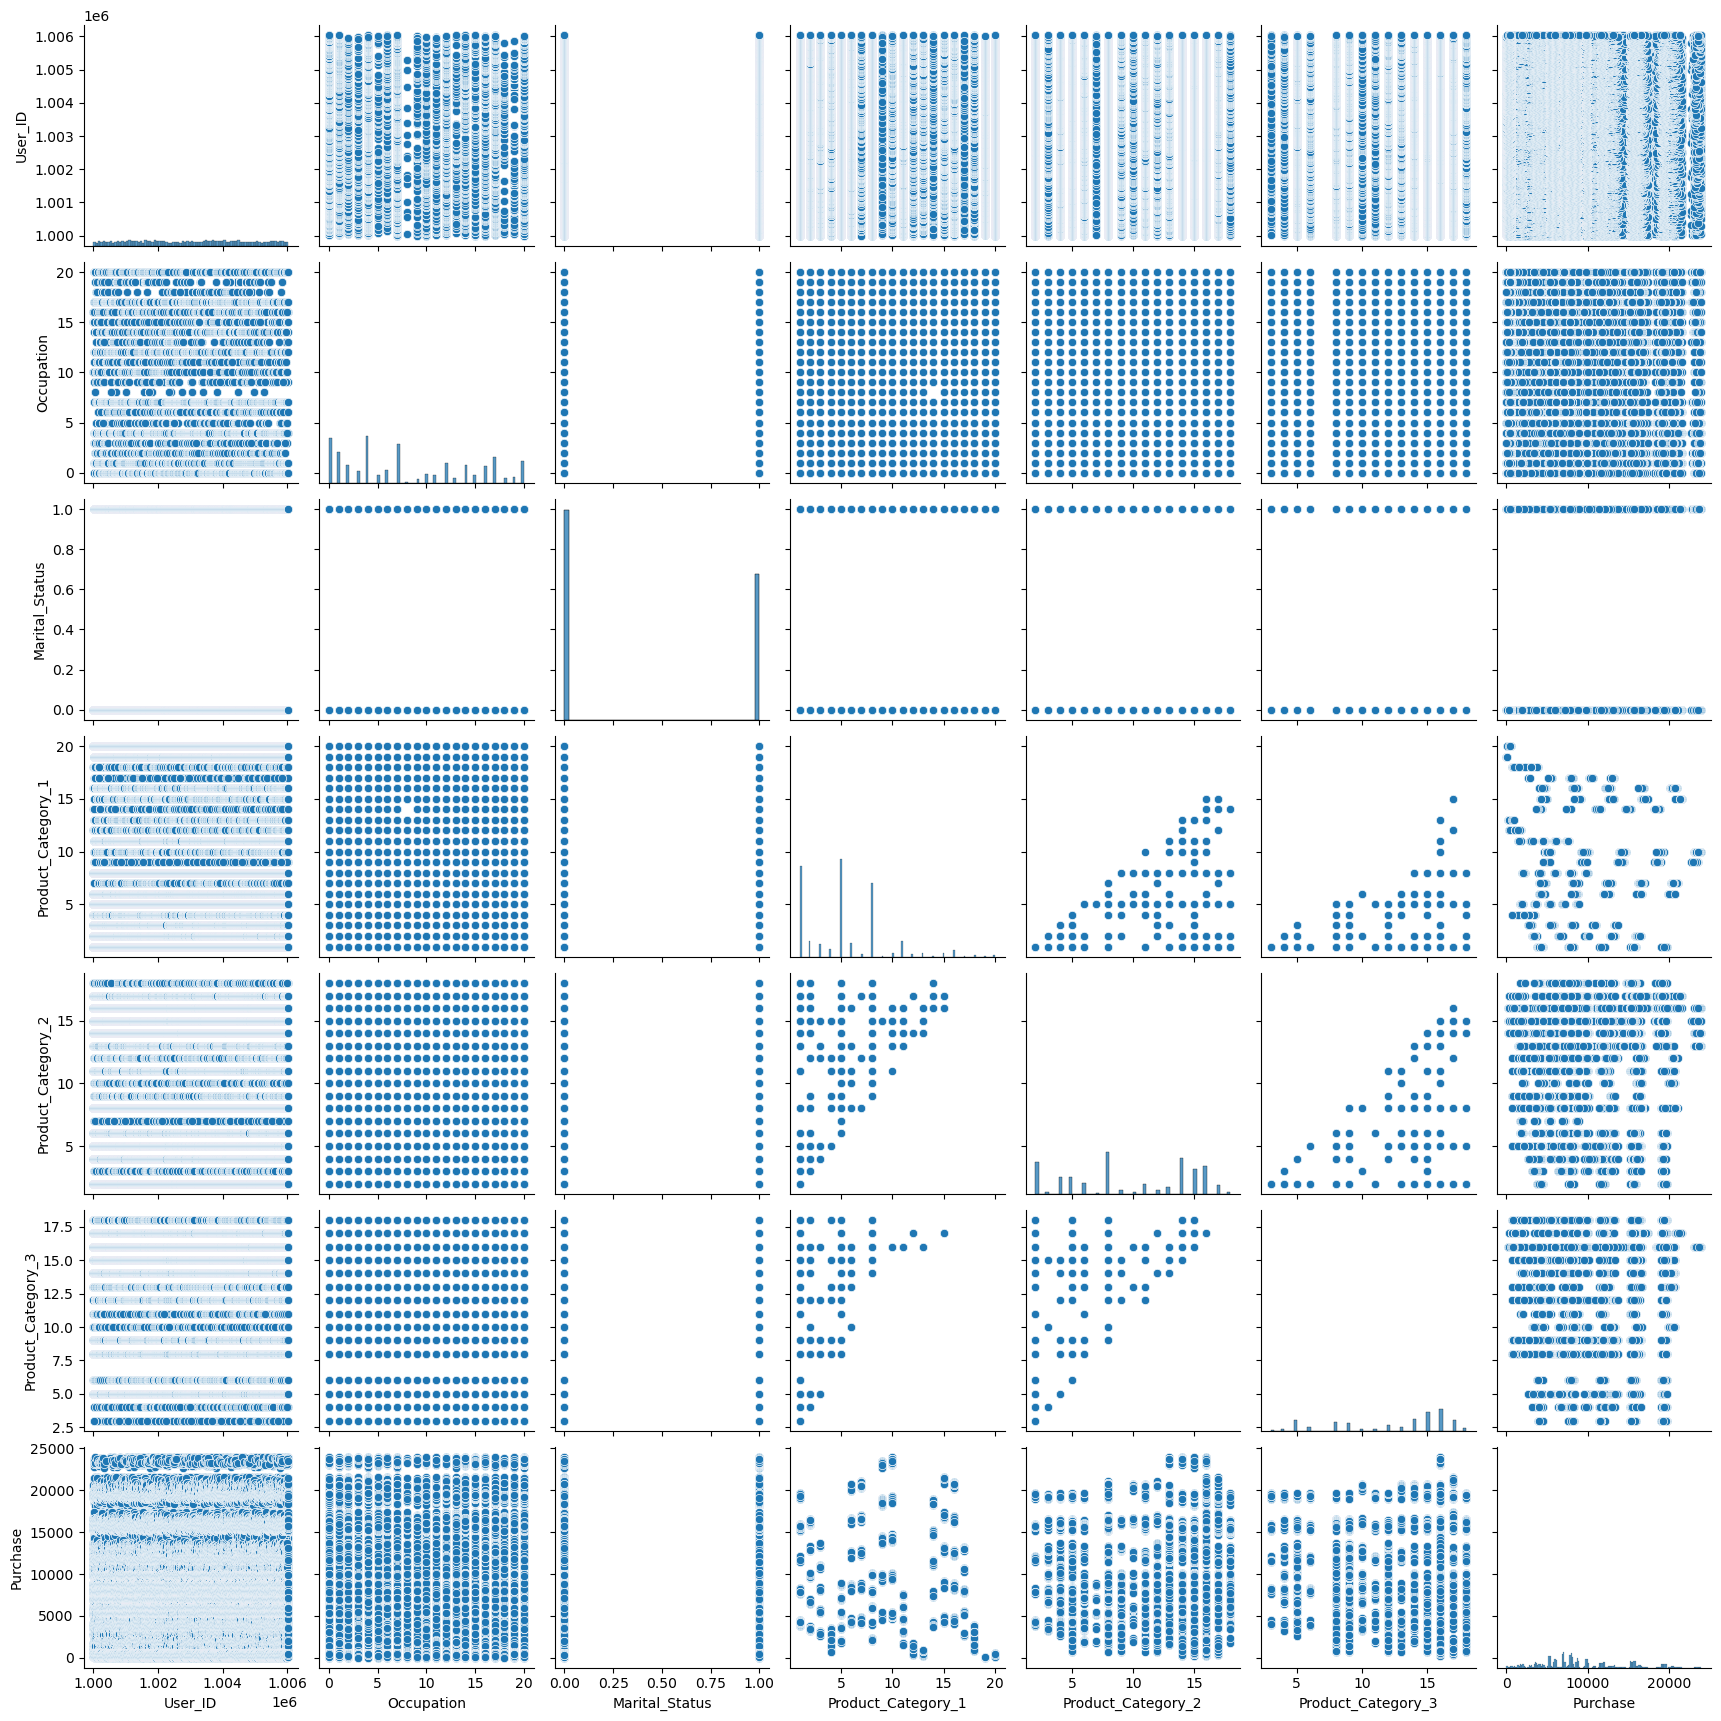

In [112]:
plt.figure(figsize=(12,12))
sns.pairplot(num_cols)
plt.show()

# fetching the final numeric and categorical variables
## dropping unnecessary columns also

In [119]:
data_new = data.drop(columns=['User_ID','Product_ID'])
data_new.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,kids,10,A,2,0,3,3,8370
1,F,kids,10,A,2,0,1,1,15200


In [123]:
cat_cols = data_new.select_dtypes(exclude=np.number)
cat_cols.head(2)

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,kids,A,2
1,F,kids,A,2


In [120]:
num_cols = data_new.select_dtypes(include=np.number)
num_cols.head(2)

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,10,0,3,3,8370
1,10,0,1,1,15200


In [127]:
for i in num_cols.columns:
    print('Column Name is;',i)
    print('Number of unique items is',data[i].nunique())
    print()

Column Name is; Occupation
Number of unique items is 21

Column Name is; Marital_Status
Number of unique items is 2

Column Name is; Product_Category_1
Number of unique items is 20

Column Name is; Product_Category_2
Number of unique items is 20

Column Name is; Purchase
Number of unique items is 18105



In [128]:
# all the number columns except Purchase is categorical columns which is encoded
# so no need to scale,transform these columns

#  Encoding

In [129]:
cat_cols.head(2)

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,kids,A,2
1,F,kids,A,2


In [133]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [137]:
le = LabelEncoder()

In [131]:
# Gender : Label encoding (zero and one ) only two categories we have here
cat_cols.Gender.unique()

array(['F', 'M'], dtype=object)

In [136]:
data_new.Gender = le.fit_transform(cat_cols.Gender)
data_new.Gender

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int32

In [132]:
# Age : ordinal encoding we have orders in age
cat_cols.Age.unique()

array(['kids', 'above55', 'youth2', 'mid-fourties', 'Fifties', 'youth3',
       'youth1'], dtype=object)

In [144]:
ordinal = OrdinalEncoder()

In [147]:
data_new.Age =   ordinal.fit_transform(cat_cols['Age'].values.reshape(-1,1))
data_new.Age

0         2.0
1         2.0
2         2.0
3         2.0
4         1.0
         ... 
550063    0.0
550064    5.0
550065    5.0
550066    1.0
550067    3.0
Name: Age, Length: 550068, dtype: float64

In [130]:
cat_cols.City_Category.unique()
# ordinal encoding as cities are divided into classes

array(['A', 'C', 'B'], dtype=object)

In [149]:
data_new.City_Category = ordinal.fit_transform(cat_cols.City_Category.values.reshape(-1,1))
data_new.City_Category

0         0.0
1         0.0
2         0.0
3         0.0
4         2.0
         ... 
550063    1.0
550064    2.0
550065    1.0
550066    2.0
550067    1.0
Name: City_Category, Length: 550068, dtype: float64

In [152]:
# Stay_in_current_years >> remaining columns onehotencoding 
final_Cleaned_data = pd.get_dummies(data_new,drop_first=True)
final_Cleaned_data

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,2.0,10,0.0,0,3,3,8370,0,1,0,0
1,0,2.0,10,0.0,0,1,1,15200,0,1,0,0
2,0,2.0,10,0.0,0,12,12,1422,0,1,0,0
3,0,2.0,10,0.0,0,12,12,1057,0,1,0,0
4,1,1.0,16,2.0,0,8,8,7969,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,0.0,13,1.0,1,20,20,368,1,0,0,0
550064,0,5.0,1,2.0,0,20,20,371,0,0,1,0
550065,0,5.0,15,1.0,1,20,20,137,0,0,0,1
550066,0,1.0,1,2.0,0,20,20,365,0,1,0,0


In [154]:
# Cleaned and analysed  data